<a href="https://colab.research.google.com/github/SamuelBrooks115/NMDSI-Research-Project/blob/main/NMDSI_Model_%2B_Eval_RandomUnderSampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: mount google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import os
import gdown

#https://drive.google.com/file/d/1-3NcsOAA6L_5xtahz3T5w93f_JRLPpfW/view?usp=drive_link
#1-3NcsOAA6L_5xtahz3T5w93f_JRLPpfW


def download_file():
  # Download the  preprocessed dataset
  file_id = '1-3NcsOAA6L_5xtahz3T5w93f_JRLPpfW'  # File ID
  destination = 'processed_dataset.csv'  # File Name


  # Construct the download URL and download the file
  download_url = f'https://drive.google.com/uc?id={file_id}'
  gdown.download(download_url, destination, quiet=False)

  #Load the dataset into a pandas DataFrame
  import pandas as pd
  dataset = pd.read_csv(destination)

  return dataset

file_name = 'processed_dataset.csv'
if os.path.exists(file_name):
  pro_dataset = pd.read_csv(file_name)
else:
  download_file()
  pro_dataset = pd.read_csv(file_name)

print(pro_dataset.head())

df = pro_dataset
df.dtypes



Downloading...
From (original): https://drive.google.com/uc?id=1-3NcsOAA6L_5xtahz3T5w93f_JRLPpfW
From (redirected): https://drive.google.com/uc?id=1-3NcsOAA6L_5xtahz3T5w93f_JRLPpfW&confirm=t&uuid=3fb3841f-5cdc-4e75-a22a-3da5036f3230
To: /content/processed_dataset.csv
100%|██████████| 479M/479M [00:06<00:00, 73.3MB/s]


          Timestamp  From Bank  Account  To Bank  Account.1  Amount Received  \
0  2022/09/01 00:20         10     6263       10       6386        -0.005770   
1  2022/09/01 00:20       3208   342898        1     172656        -0.005774   
2  2022/09/01 00:00       3209   343200     3209     328327        -0.005760   
3  2022/09/01 00:02         12    71212       12      72895        -0.005771   
4  2022/09/01 00:06         10     6270       10       6394        -0.005739   

   Receiving Currency  Amount Paid  Payment Currency  Payment Format  \
0                  12    -0.005180                12               5   
1                  12    -0.005184                12               3   
2                  12    -0.005168                12               5   
3                  12    -0.005181                12               5   
4                  12    -0.005142                12               5   

   Is Laundering  
0              0  
1              0  
2              0  
3         

,0
Timestamp,object
From Bank,int64
Account,int64
To Bank,int64
Account.1,int64
Amount Received,float64
Receiving Currency,int64
Amount Paid,float64
Payment Currency,int64
Payment Format,int64


In [ ]:
# prompt: check if the df variable is a pandas dataframe and if so return true

import pandas as pd
isinstance(df, pd.DataFrame)


True

In [3]:
import numpy as np
import pandas as pd
import torch
from torch.utils.data import DataLoader, Dataset, random_split
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix



In [ ]:
# Create sequences for LSTM
sequence_length =10  # Define sequence length
sequences = []
labels = []

batch_size = 100000  # Adjust batch size as needed
num_batches = (len(df) - sequence_length + 1) // batch_size + 1
batch_count = 0

for start_idx in range(0, len(df) - sequence_length + 1, batch_size):
    end_idx = min(start_idx + batch_size, len(df) - sequence_length + 1)
    for i in range(start_idx, end_idx):
        sequences.append(df.iloc[i:i + sequence_length].drop(columns=['Timestamp', 'Is Laundering']).values)
        labels.append(df['Is Laundering'].iloc[i + sequence_length - 1])

    batch_count += 1
    print(f"Processed batch {batch_count}/{num_batches}")

sequences = np.array(sequences)
labels = np.array(labels)

print(sequences.shape)
print(labels.shape)





Processed batch 1/51
Processed batch 2/51
Processed batch 3/51


KeyboardInterrupt: 

In [ ]:
#Creating the sequences and labels takes forever so I just saved it to my google drive
np.save('/content/drive/My Drive/sequences.npy', sequences)
np.save('/content/drive/My Drive/labels.npy', labels)

print("Sequences and labels saved to files.")

Sequences and labels saved to files.


(5078336, 10, 9)

In [ ]:
print(sequences.dtype)
print(labels.dtype)


sequences = sequences.astype(np.float32)
labels = labels.astype(np.int8)

# Save the arrays
np.save('/content/drive/My Drive/sequences.npy', sequences)
np.save('/content/drive/My Drive/labels.npy', labels)

print("Sequences and labels saved to files.")

print(sequences.dtype)
print(labels.dtype)

float64
int64
Sequences and labels saved to files.
float32
int8


In [4]:
import gdown
import numpy as np

def download_seq():
  #https://drive.google.com/file/d/1uAlQRTJToXbYXD3PEk3hvxsDdvGiEoB3/view?usp=sharing
  #1uAlQRTJToXbYXD3PEk3hvxsDdvGiEoB3

  # Download the  preprocessed dataset
  file_id = '1uAlQRTJToXbYXD3PEk3hvxsDdvGiEoB3'  # File ID
  destination = 'sequences.npy'  # File Name


  # Construct the download URL and download the file
  download_url = f'https://drive.google.com/uc?id={file_id}'
  gdown.download(download_url, destination, quiet=False)

  #Load the dataset into a numpy array
  sequences = np.load(destination)

  return sequences

def download_label():
  #https://drive.google.com/file/d/15QTJnp5N71N47hUjGjli5Pl5d-co0eXR/view?usp=sharing
  #15QTJnp5N71N47hUjGjli5Pl5d-co0eXR


  # Download the  preprocessed dataset
  file_id = '15QTJnp5N71N47hUjGjli5Pl5d-co0eXR'  # File ID
  destination = 'labels.npy'  # File Name


  # Construct the download URL and download the file
  download_url = f'https://drive.google.com/uc?id={file_id}'
  gdown.download(download_url, destination, quiet=False)

  #Load the dataset into a numpy array
  import numpy as np
  labels = np.load(destination)

  return labels


sequences = download_seq()
labels = download_label()

sequences = np.array(sequences)
labels = np.array(labels)

print(sequences.shape)
print(labels)
print (sequences.dtype)
print (labels.dtype)

Downloading...
From (original): https://drive.google.com/uc?id=1uAlQRTJToXbYXD3PEk3hvxsDdvGiEoB3
From (redirected): https://drive.google.com/uc?id=1uAlQRTJToXbYXD3PEk3hvxsDdvGiEoB3&confirm=t&uuid=1500af44-2c8a-468a-9839-b44fb61ac332
To: /content/sequences.npy
100%|██████████| 1.83G/1.83G [00:11<00:00, 156MB/s]
Downloading...
From: https://drive.google.com/uc?id=15QTJnp5N71N47hUjGjli5Pl5d-co0eXR
To: /content/labels.npy
100%|██████████| 5.08M/5.08M [00:00<00:00, 44.1MB/s]


(5078336, 10, 9)
[0 0 0 ... 0 0 0]
float32
int8


In [29]:
#Random Under Sampling
from imblearn.under_sampling import RandomUnderSampler

num_sequences, seq_length, num_features = sequences.shape
sequences_reshaped = sequences.reshape(num_sequences, -1)

rus = RandomUnderSampler(random_state=42)
sequences_resampled, labels_resampled = rus.fit_resample(sequences_reshaped, labels)

sequences_resampled = sequences_resampled.reshape(-1, seq_length, num_features)

'''

#Cell where I try out different methods to handle imbalanced data

#Oversampling - Extremly high Class imbalance

#Reshape sequences to 2D array for Oversampling - imblearn library expects 2D input
num_sequences, seq_length, num_features = sequences.shape
sequences_reshaped = sequences.reshape(sequences.shape[0], -1)

#Oversampling
smote = SMOTE(random_state=15) #Random State = 15 for reproducable results
sequences_resampled, labels_resampled = smote.fit_resample(sequences_reshaped, labels)

#Reshape back to original 3D shape
sequences_resampled = sequences_resampled.reshape((-1, seq_length, num_features))


#Penalizing misclassification on the minority class
#Change numbers if you change to a larger dataset - HI_Med etc.
minority_class = 5100
majority_class = 4994900

ratio_maj_min = minority_class/majority_class
print(ratio_maj_min) '''

'\n\n#Cell where I try out different methods to handle imbalanced data\n\n#Oversampling - Extremly high Class imbalance\n\n#Reshape sequences to 2D array for Oversampling - imblearn library expects 2D input\nnum_sequences, seq_length, num_features = sequences.shape\nsequences_reshaped = sequences.reshape(sequences.shape[0], -1)\n\n#Oversampling\nsmote = SMOTE(random_state=15) #Random State = 15 for reproducable results\nsequences_resampled, labels_resampled = smote.fit_resample(sequences_reshaped, labels)\n\n#Reshape back to original 3D shape\nsequences_resampled = sequences_resampled.reshape((-1, seq_length, num_features))\n\n\n#Penalizing misclassification on the minority class\n#Change numbers if you change to a larger dataset - HI_Med etc.\nminority_class = 5100\nmajority_class = 4994900\n\nratio_maj_min = minority_class/majority_class\nprint(ratio_maj_min) '

In [30]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    def forward(self, x):
        h0 = torch.zeros(num_layers, x.size(0), hidden_dim).to(x.device)
        c0 = torch.zeros(num_layers, x.size(0), hidden_dim).to(x.device)

        out, _ = self.lstm(x, (h0, c0))
        out = out[:, -1, :]  # Take the output of the last time step
        out = self.fc(out)
        return torch.sigmoid(out)

class TransactionDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = sequences
        self.labels = labels

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        return torch.tensor(self.sequences[idx], dtype=torch.float32), torch.tensor(self.labels[idx], dtype=torch.float32)


In [31]:
# Create Dataset and DataLoader
'''
sequences_resampled = sequences #Placeholder variable if penalizing method doesnt work
labels_resampled = labels #Placeholder variable if the penalizing method doesnt work
'''

dataset = TransactionDataset(sequences_resampled, labels_resampled)

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

Epoch 1/20, Average Loss: 0.6955
Epoch 2/20, Average Loss: 0.6850
Epoch 3/20, Average Loss: 0.6830
Epoch 4/20, Average Loss: 0.6780
Epoch 5/20, Average Loss: 0.6729
Epoch 6/20, Average Loss: 0.6646
Epoch 7/20, Average Loss: 0.6508
Epoch 8/20, Average Loss: 0.6466
Epoch 9/20, Average Loss: 0.6358
Epoch 10/20, Average Loss: 0.6377
Epoch 11/20, Average Loss: 0.6293
Epoch 12/20, Average Loss: 0.6268
Epoch 13/20, Average Loss: 0.6242
Epoch 14/20, Average Loss: 0.6257
Epoch 15/20, Average Loss: 0.6236
Epoch 16/20, Average Loss: 0.6271
Epoch 17/20, Average Loss: 0.6241
Epoch 18/20, Average Loss: 0.6206
Epoch 19/20, Average Loss: 0.6214
Epoch 20/20, Average Loss: 0.6224


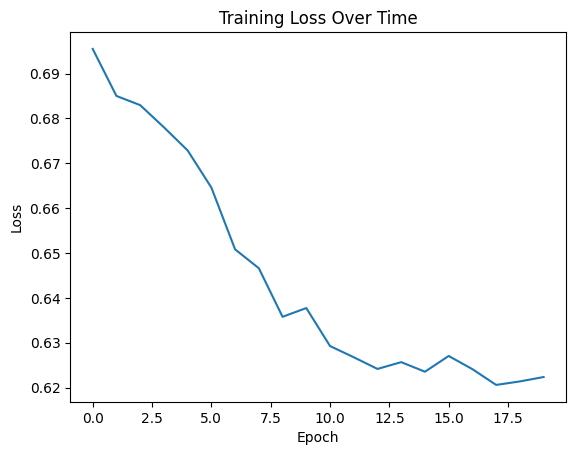

In [32]:
# Define model parameters
input_dim = sequences.shape[2]
hidden_dim = 64
num_layers = 2
output_dim = 1

# Instantiate the model
model = LSTMModel(input_dim, hidden_dim, num_layers, output_dim)
model.to(model.device)

#Define Positive weights
'''
minority_class = 5100
majority_class = 4994900

total = minority_class + majority_class #5,000,000 total
pos_weight = torch.tensor([majority_class / minority_class], dtype=torch.float32).to(model.device) #Pos_weight = positive weight or the weight on 1
'''

#weight = torch.tensor([10]).to(model.device)

# Define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()  # Binary Cross-Entropy loss with logits
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Apply weight initialization
def weights_init(m):
    if isinstance(m, nn.Linear) or isinstance(m, nn.Conv2d):
        nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            nn.init.constant_(m.bias, 0)

model.apply(weights_init)

# Training loop
def train(model, train_loader, criterion, optimizer, num_epochs=20):
    model.train()
    loss_history = []
    for epoch in range(num_epochs):
        total_loss = 0
        for sequences, labels in train_loader:
            sequences, labels = sequences.to(model.device), labels.to(model.device).unsqueeze(1)
            optimizer.zero_grad()
            output = model(sequences)

            loss = criterion(output, labels)
            loss.backward()

            # Gradient clipping
            nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

            optimizer.step()
            total_loss += loss.item()

        avg_loss = total_loss / len(train_loader)
        loss_history.append(avg_loss)
        print(f"Epoch {epoch+1}/{num_epochs}, Average Loss: {avg_loss:.4f}")

    plt.plot(loss_history)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Over Time')
    plt.show()


# Train the model
train(model, train_loader, criterion, optimizer)


In [33]:
import torch
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Evaluation function
def evaluate(model, data_loader, criterion):
    model.eval()
    total_loss = 0
    correct_predictions = 0
    total_predictions = 0
    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for sequences, labels in data_loader:
            sequences, labels = sequences.to(model.device), labels.to(model.device).unsqueeze(1).float()
            output = model(sequences)
            loss = criterion(output, labels)
            total_loss += loss.item()

            predicted = (output > 0.5).float()
            correct_predictions += (predicted == labels).sum().item()
            total_predictions += labels.size(0)

            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    accuracy = correct_predictions / total_predictions
    precision = precision_score(all_labels, all_predictions)
    recall = recall_score(all_labels, all_predictions)
    f1 = f1_score(all_labels, all_predictions)
    cm = confusion_matrix(all_labels, all_predictions)

    return total_loss / len(data_loader), accuracy, precision, recall, f1, cm

# Evaluate the model
eval_loss, eval_accuracy, eval_precision, eval_recall, eval_f1, eval_cm = evaluate(model, test_loader, criterion)
print(f"Evaluation Loss: {eval_loss:.4f}, Accuracy: {eval_accuracy:.4f}")
print(f"Precision: {eval_precision:.4f}, Recall: {eval_recall:.4f}, F1 Score: {eval_f1:.4f}")
print(f"Confusion Matrix:\n{eval_cm}")



Evaluation Loss: 0.6249, Accuracy: 0.7224
Precision: 0.8510, Recall: 0.5368, F1 Score: 0.6583
Confusion Matrix:
[[942  97]
 [478 554]]
